INSTALLING REQUIRED LIBRARIES

In [82]:
!pip install matplotlib
!pip install pandas
!pip install seaborn

IMPORTING LIBRARIES

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Initialization
le = LabelEncoder()
ss = StandardScaler()

LOADING DATASET

*from kaggle : https://www.kaggle.com/datasets/oktayrdeki/heart-disease

In [84]:
data = pd.read_csv('heart_disease.csv')

DATA PREPROCESSING

In [85]:
# Dataset Information
data.info()
data.describe()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,None,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,None,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [86]:
# Checking Data Distribution
data['Heart Disease Status'].value_counts()
data['Heart Disease Status'].value_counts(normalize=True) * 100

No     80.0
Yes    20.0
Name: Heart Disease Status, dtype: float64

DATA PREPROCESSING

In [87]:
# Data Cleaning
print('Checking Missing Values')
print(data.isna().sum())

print('\nChecking Duplicated Values')
print(data.duplicated().sum())

Checking Missing Values
Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

Checking Duplicated Values
0


In [88]:
numerical_cols = data.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()


print('Numerical Columns Imputation:')
for col in numerical_cols:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)
    print(f"[{col}] Imputed Median: {median_val:.2f}")

print('\nCategorical Columns Imputation:')
for col in categorical_cols:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)
    print(f"[{col}] Imputed Mode: {mode_val}")

Numerical Columns Imputation:
[Age] Imputed Median: 49.00
[Blood Pressure] Imputed Median: 150.00
[Cholesterol Level] Imputed Median: 226.00
[BMI] Imputed Median: 29.08
[Sleep Hours] Imputed Median: 7.00
[Triglyceride Level] Imputed Median: 250.00
[Fasting Blood Sugar] Imputed Median: 120.00
[CRP Level] Imputed Median: 7.47
[Homocysteine Level] Imputed Median: 12.41

Categorical Columns Imputation:
[Gender] Imputed Mode: Male
[Exercise Habits] Imputed Mode: High
[Smoking] Imputed Mode: Yes
[Family Heart Disease] Imputed Mode: No
[Diabetes] Imputed Mode: No
[High Blood Pressure] Imputed Mode: Yes
[Low HDL Cholesterol] Imputed Mode: Yes
[High LDL Cholesterol] Imputed Mode: No
[Alcohol Consumption] Imputed Mode: None
[Stress Level] Imputed Mode: Medium
[Sugar Consumption] Imputed Mode: Low
[Heart Disease Status] Imputed Mode: No


In [89]:
# Data Missing Values After Imputation
print(data.isna().sum())

data[numerical_cols].dtypes

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


Age                    float64
Blood Pressure         float64
Cholesterol Level      float64
BMI                    float64
Sleep Hours            float64
Triglyceride Level     float64
Fasting Blood Sugar    float64
CRP Level              float64
Homocysteine Level     float64
dtype: object

In [90]:
# Data Type Conversion
    # Binary Encoding
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
binary_cols = ['Heart Disease Status', 'Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
               'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol']
for col in binary_cols:
    data[col] = data[col].map(binary_map)

    # Ordinal Encoding
mapping_lmh = {'Low': 1, 'Medium': 2, 'High': 3}
mapping_nlmh = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}
data['Exercise Habits'] = data['Exercise Habits'].map(mapping_lmh)
data['Stress Level'] = data['Stress Level'].map(mapping_lmh)
data['Sugar Consumption'] = data['Sugar Consumption'].map(mapping_lmh)
data['Alcohol Consumption'] = data['Alcohol Consumption'].map(mapping_nlmh)

    # Label Encoding
data['Heart Disease Status'] = le.fit_transform(data['Heart Disease Status'])

data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,3,1,1,0,24.991591,1,...,0,3,2,7.633228,2,342.0,120.0,12.969246,12.387250,0
1,69.0,0,146.0,286.0,3,0,1,1,25.221799,0,...,0,2,3,8.744034,2,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,...,1,1,1,4.440440,1,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,3,1,1,0,24.130477,1,...,1,1,3,5.249405,3,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,...,0,1,3,7.030971,3,263.0,154.0,10.381259,8.153887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,2,1,0,0,18.788791,1,...,1,2,3,6.834954,2,343.0,133.0,3.588814,19.132004,1
9996,38.0,1,172.0,154.0,2,0,0,0,31.856801,1,...,1,0,3,8.247784,1,377.0,83.0,2.658267,9.715709,1
9997,73.0,1,152.0,201.0,3,1,0,1,26.899911,0,...,1,0,1,4.436762,1,248.0,88.0,4.408867,9.492429,1
9998,23.0,1,142.0,299.0,1,1,0,1,34.964026,1,...,1,2,3,8.526329,2,113.0,153.0,7.215634,11.873486,1


CORRELATION HEATMAP

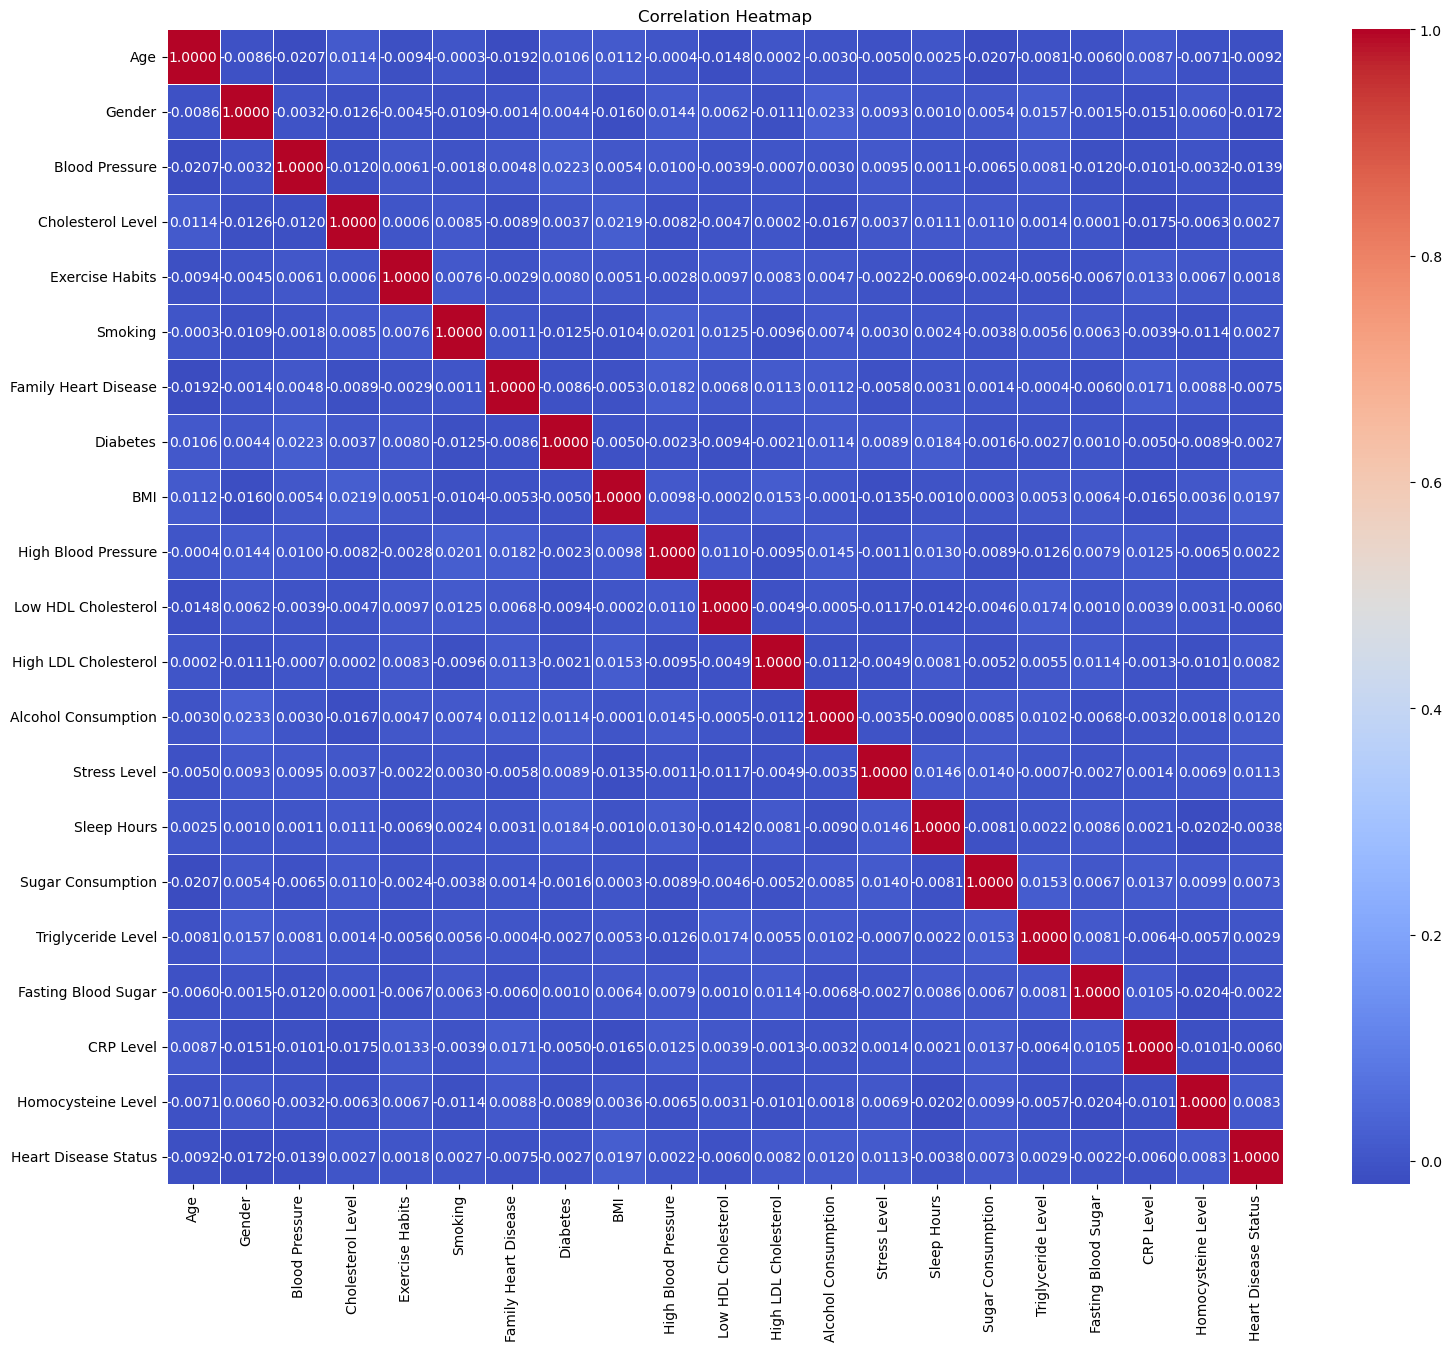


Correlation Feature with Target Label ---
Heart Disease Status    1.000000
BMI                     0.019682
Alcohol Consumption     0.012021
Stress Level            0.011332
Homocysteine Level      0.008302
High LDL Cholesterol    0.008201
Sugar Consumption       0.007303
Triglyceride Level      0.002904
Cholesterol Level       0.002703
Smoking                 0.002701
High Blood Pressure     0.002200
Exercise Habits         0.001776
Fasting Blood Sugar    -0.002248
Diabetes               -0.002700
Sleep Hours            -0.003821
Low HDL Cholesterol    -0.006000
CRP Level              -0.006009
Family Heart Disease   -0.007500
Age                    -0.009231
Blood Pressure         -0.013876
Gender                 -0.017200
Name: Heart Disease Status, dtype: float64


In [91]:
plt.figure(figsize=(18, 15))
correlation_matrix = data.corr() 

sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm', 
            fmt=".4f", 
            linewidths=.5, 
            cbar=True) 

plt.title('Correlation Heatmap')
plt.show()

print("\nCorrelation Feature with Target Label ---")
print(correlation_matrix['Heart Disease Status'].sort_values(ascending=False))

DATA SPLITTING & SCALING

In [92]:
# Data Splitting
x = data.drop(columns=['Heart Disease Status', 'High Blood Pressure'], axis=1)
y = data['Heart Disease Status']

# Feature and Target Variables
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0       1           153.0              155.0                3   
1     69.0       0           146.0              286.0                3   
2     46.0       1           126.0              216.0                1   
3     32.0       0           122.0              293.0                3   
4     60.0       1           166.0              242.0                1   
...    ...     ...             ...                ...              ...   
9995  25.0       0           136.0              243.0                2   
9996  38.0       1           172.0              154.0                2   
9997  73.0       1           152.0              201.0                3   
9998  23.0       1           142.0              299.0                1   
9999  38.0       0           128.0              193.0                2   

      Smoking  Family Heart Disease  Diabetes        BMI  Low HDL Cholesterol  \
0           1                 

In [93]:
# Data Scaling
numerical_cols_to_scale = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
                           'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

x_train[numerical_cols_to_scale] = ss.fit_transform(x_train[numerical_cols_to_scale])
x_test[numerical_cols_to_scale] = ss.transform(x_test[numerical_cols_to_scale])

In [94]:
x_train

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
9254,1.590127,1,-0.554044,1.463132,3,1,1,0,-0.628276,1,0,1,3,1.167006,2,-0.330039,0.723332,1.619393,-0.260294
1561,0.818773,1,-0.383093,-0.511789,1,1,1,1,-0.833585,1,0,3,2,-0.249507,2,-0.719569,-0.379438,-0.225594,0.765291
1670,-1.715679,0,-0.155159,-1.476285,1,1,1,1,1.276632,0,0,3,3,-1.351854,1,0.093861,0.129533,-0.941166,0.512039
6087,-1.385099,0,-0.269126,-0.695502,2,1,0,0,-0.813631,0,0,0,2,-1.150793,3,-0.868507,-0.803580,0.585106,0.426861
6669,-0.007679,1,0.414676,1.509060,2,1,0,1,-1.041884,0,1,0,1,0.473982,2,0.116774,-0.888408,-1.004069,0.648815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.668840,1,1.041495,-0.098433,2,0,1,0,-1.632712,0,0,0,3,1.269718,3,1.537412,1.062646,0.930836,-1.627205
5191,0.267805,0,0.357693,0.820134,3,0,0,0,-0.180609,1,1,2,2,0.643975,2,1.056228,0.765746,1.269837,1.569698
5390,-0.007679,0,-0.326110,0.062316,2,0,1,0,0.715916,1,0,0,3,0.382383,1,-1.659023,1.656445,1.426738,0.133937
860,-1.495292,0,-0.724994,0.291958,1,1,0,0,-0.839771,1,1,2,2,-1.124328,3,-0.421693,-1.185308,-0.943286,0.461566


In [95]:
x_test

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
6252,-0.613744,1,1.098479,-1.591105,2,1,0,1,0.991777,0,1,2,3,-1.579493,2,0.804180,1.614030,0.534232,1.143752
4684,1.535031,0,1.383397,1.256454,2,1,1,0,0.117899,0,1,0,2,-1.084304,2,0.701069,-1.694278,1.593789,-0.860037
1731,-1.605486,1,1.554347,1.600917,2,0,0,0,1.120350,0,1,0,1,0.747422,2,-0.020707,1.274717,-1.618148,0.461949
4742,1.314644,0,-0.952929,0.682349,3,0,1,1,0.564127,0,1,2,3,0.745059,3,-0.731026,1.317131,-0.956723,-1.421003
4521,0.928966,1,0.072775,-0.649574,1,0,0,1,-0.224636,0,0,2,3,1.521809,2,0.655242,0.341604,-0.176796,-1.131206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,1.149353,1,-1.408797,1.210526,3,0,0,1,-1.123051,1,0,3,3,0.778651,2,-1.670480,-0.803580,-1.534640,0.548457
8285,-0.228066,1,1.725298,0.705314,1,0,1,0,1.189841,0,1,2,2,0.654493,1,0.219885,1.614030,1.342179,-0.066454
7853,-1.109615,1,0.813561,0.682349,3,1,1,0,0.932319,1,0,2,3,0.192636,2,-0.536261,1.020231,0.722034,-1.172652
1095,-0.503550,0,1.611331,1.302382,2,0,0,0,-0.094275,0,1,3,2,-1.032197,3,-1.097642,0.511261,-0.476245,-0.803454


MODEL TRAINING & EVALUATION

In [96]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}

results = {}

In [97]:
for name, model in models.items():
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VISUALIZATION

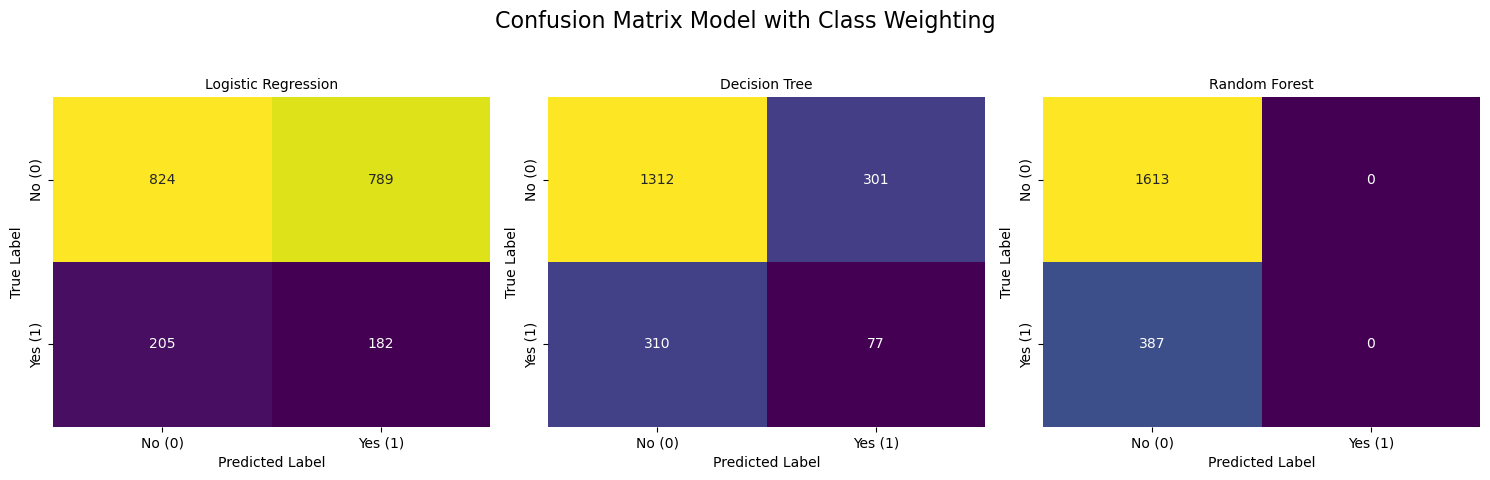

                     Accuracy  Precision  Recall  F1-Score
Model                                                     
Logistic Regression    0.5030     0.1874  0.4703    0.2680
Decision Tree          0.6945     0.2037  0.1990    0.2013
Random Forest          0.8065     0.0000  0.0000    0.0000


In [98]:
all_results = results
model_metrics = []

num_models = len(all_results)
cols = 3
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten() 
fig.suptitle('Confusion Matrix Model with Class Weighting', fontsize=16) 


for i, (name, result) in enumerate(all_results.items()):
    cm = result['Confusion Matrix']
    
    # Report Conversion for Metric Extraction
    report_dict = result['Report']

    # Key Metric Storage for Comparison (Focus on class 1 = Yes)
    if '1' in report_dict:
        model_metrics.append({
            'Model': name,
            'Accuracy': result['Accuracy'],
            'Recall': report_dict['1']['recall'],
            'F1-Score': report_dict['1']['f1-score'],
            'Precision': report_dict['1']['precision']
        })
    else:
         model_metrics.append({
            'Model': name,
            'Accuracy': result['Accuracy'],
            'Recall': 0.0,
            'F1-Score': 0.0,
            'Precision': 0.0
        })

    # Confusion Matrix Visualization
    sns.heatmap(cm, 
                annot=True, 
                fmt='d',
                cmap='viridis', 
                cbar=False, 
                ax=axes[i],
                xticklabels=['No (0)', 'Yes (1)'],
                yticklabels=['No (0)', 'Yes (1)'])
    
    axes[i].set_title(name, fontsize=10)
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

metrics_df = pd.DataFrame(model_metrics)
metrics_df = metrics_df.set_index('Model')
metrics_df = metrics_df.round(4)

print(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']])

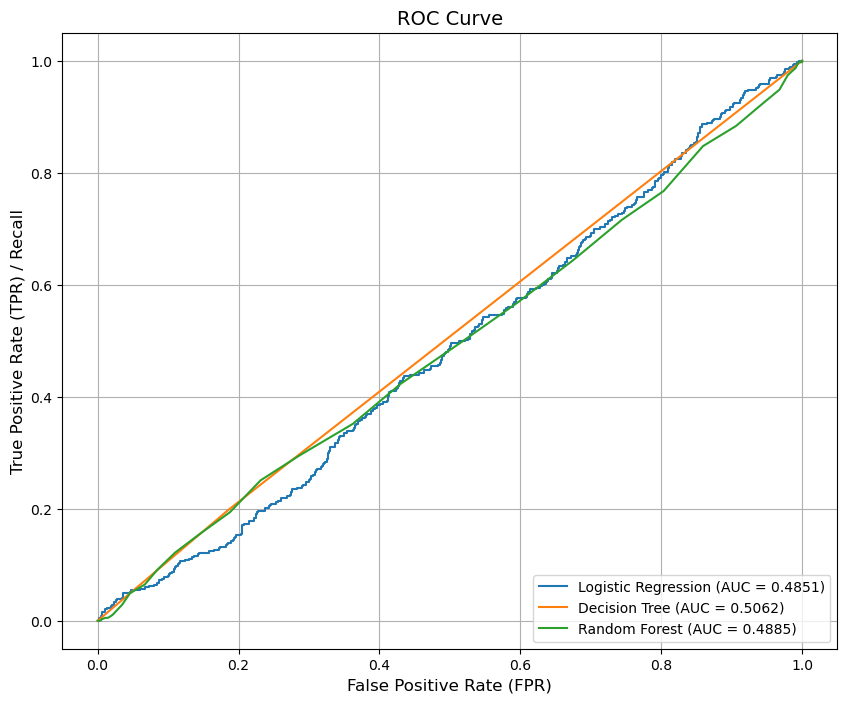

In [99]:
# ROC Curve Visualization
plt.figure(figsize=(10, 8))
plt.title('ROC Curve', fontsize=14)

for name, model in models.items():
    # Yes Probability Prediction
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(x_test)[:, 1]
    else:
        try:
            y_score = model.decision_function(x_test)
        except AttributeError:
            y_score = model.predict(x_test) 
    
    # TPR and FPR Calculation
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plotting
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

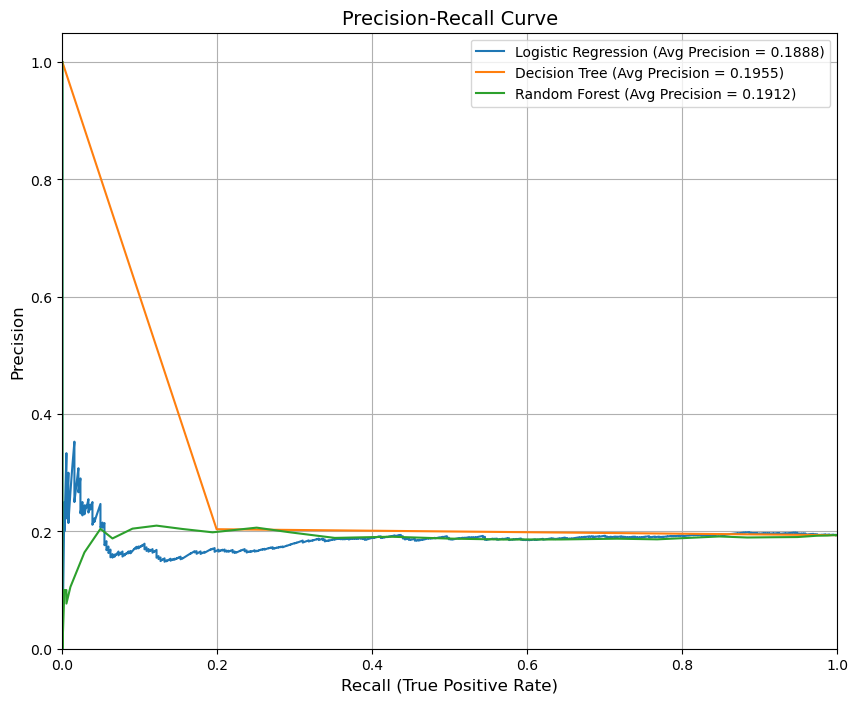

                        AUC  Average Precision
Model                                         
Logistic Regression  0.4851             0.1888
Decision Tree        0.5062             0.1955
Random Forest        0.4885             0.1912


In [100]:
# Precision-Recall Curve Visualization
plt.figure(figsize=(10, 8))
plt.title('Precision-Recall Curve', fontsize=14)

for name, model in models.items():
    # Yes Probability Prediction
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(x_test)[:, 1]
    else:
        try:
            y_score = model.decision_function(x_test)
        except AttributeError:
            y_score = model.predict(x_test)

    # Precision, Recall, & Thresholds Calculation
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    avg_precision = average_precision_score(y_test, y_score)
    
    # Plotting
    plt.plot(recall, precision, label=f'{name} (Avg Precision = {avg_precision:.4f})')

plt.xlabel('Recall (True Positive Rate)', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

# Metric Summary Table
summary_metrics = []
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(x_test)[:, 1]
    else:
        y_score = model.predict(x_test)

    # AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Average Precision
    avg_precision = average_precision_score(y_test, y_score)
    
    summary_metrics.append({
        'Model': name,
        'AUC': roc_auc,
        'Average Precision': avg_precision
    })

summary_df = pd.DataFrame(summary_metrics).set_index('Model').round(4)
print(summary_df)

SUMMARY
1. Random Forest menunjukan Recall dan F1-Score yang bernilai 0 untuk Class 1, hal ini disebabkan class imbalance sangat parah yang membuat model tidak dapat digunakan untuk Heart Disease Detection.
2. Ketiga model menunjukan nilai AUC dan Average Precision yang sangat rendah, bahkan di bawah 0.5 untuk nilai AUC Logistic Regression dan Random Forest.
3. Model Logistic Regression merupakan pilihan terbaik, tetapi tetap gagal total. Dimana Logistic Regression memiliki 0.4703 untuk nilai Recall-nya.